<a href="https://colab.research.google.com/github/shritigupta/EVA/blob/master/S9/QuizS9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [2]:
from datetime import datetime 
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-03-21 21:15:32.150794



Training a Classifier
=====================

This is it. You have seen how to define neural networks, compute loss and make
updates to the weights of the network.

Now you might be thinking,

What about data?
----------------

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

.. figure:: /_static/img/cifar10.png
   :alt: cifar10

   cifar10


Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

1. Loading and normalizing CIFAR10
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Using ``torchvision``, it’s extremely easy to load CIFAR10.



In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [4]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
%cd /content/gdrive/My\ Drive/ass_util/

Mounted at /content/gdrive
/content/gdrive/My Drive/ass_util


In [5]:
import my_transform
#transform = my_transform.transform

trainset = my_transform.trainset
trainloader = my_transform.trainloader

testset = my_transform.testset
testloader = my_transform.testloader

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 ship  deer horse   car


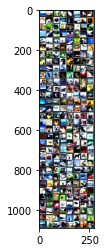

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [7]:
#!pip install torchsummary
from torchsummary import summary
#import resnet
from QuizDNN import QModel
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
net = QModel().to(device)
summary(net, input_size=(3, 32, 32))


torch.Size([2, 32, 32, 32])
torch.Size([2, 32, 16, 16])
torch.Size([2, 64, 16, 16])
torch.Size([2, 64, 8, 8])
torch.Size([2, 128, 8, 8])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]              96
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           9,216
      BatchNorm2d-10           [-1, 32, 32, 32]              64
             ReLU-11           [-1, 32, 32, 32]               0
          Dropout-12          

3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [0]:
import torch.optim as optim
import torch.nn as nn
learning_rate = 0.1
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [0]:
from tqdm import tqdm
import train_acc_loss as tr 
import test_acc_loss as ts


In [10]:
test_acc = []
train_acc = []
for epoch in range(1, 30):
        learning_rate = my_transform.adjust_learning_rate(learning_rate, epoch)
        epoch_train_acc,epoch_train_loss = tr.train(net, device, trainloader, optimizer, criterion, epoch)        
        epoch_test_acc,epoch_test_loss = ts.test(net, device, testloader,epoch,criterion )

        print('\nEpoch: {:.0f} Train set: Average loss: {:.4f}, Accuracy: {:.3f}%'.format(epoch, epoch_train_loss, epoch_train_acc))
        print('Epoch: {:.0f} Test set: Average loss: {:.4f}, Accuracy: {:.3f}%'.format(epoch, epoch_test_loss, epoch_test_acc))

  1%|          | 1/196 [00:00<01:58,  1.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  2%|▏         | 4/196 [00:00<01:05,  2.92it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 6/196 [00:01<00:50,  3.76it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  5%|▌         | 10/196 [00:01<00:31,  5.96it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 12/196 [00:01<00:26,  7.02it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  8%|▊         | 16/196 [00:01<00:20,  8.93it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▉         | 18/196 [00:01<00:18,  9.83it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 11%|█         | 22/196 [00:02<00:15, 11.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 24/196 [00:02<00:14, 11.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 14%|█▍        | 28/196 [00:02<00:14, 11.98it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▌        | 30/196 [00:02<00:13, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 17%|█▋        | 34/196 [00:03<00:12, 12.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 36/196 [00:03<00:12, 12.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 20%|██        | 40/196 [00:03<00:12, 12.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██▏       | 42/196 [00:03<00:12, 12.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 23%|██▎       | 46/196 [00:04<00:12, 12.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 48/196 [00:04<00:11, 12.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 52/196 [00:04<00:11, 13.06it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 54/196 [00:04<00:10, 13.00it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|██▉       | 58/196 [00:05<00:10, 12.74it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 60/196 [00:05<00:10, 12.69it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 64/196 [00:05<00:10, 12.67it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▎      | 66/196 [00:05<00:10, 12.79it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 70/196 [00:06<00:09, 12.85it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 72/196 [00:06<00:09, 13.05it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 76/196 [00:06<00:09, 12.72it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|███▉      | 78/196 [00:06<00:09, 12.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 82/196 [00:07<00:09, 12.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 84/196 [00:07<00:08, 12.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▍     | 88/196 [00:07<00:08, 12.75it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▌     | 90/196 [00:07<00:08, 12.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 94/196 [00:07<00:08, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 96/196 [00:08<00:07, 12.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 51%|█████     | 100/196 [00:08<00:07, 12.78it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 102/196 [00:08<00:07, 13.17it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 54%|█████▍    | 106/196 [00:08<00:06, 12.91it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▌    | 108/196 [00:09<00:07, 12.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 57%|█████▋    | 112/196 [00:09<00:06, 12.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 114/196 [00:09<00:06, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 60%|██████    | 118/196 [00:09<00:06, 12.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 120/196 [00:10<00:05, 12.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 63%|██████▎   | 124/196 [00:10<00:05, 12.87it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 126/196 [00:10<00:05, 12.85it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 66%|██████▋   | 130/196 [00:10<00:05, 12.82it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 132/196 [00:10<00:05, 12.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 69%|██████▉   | 136/196 [00:11<00:04, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|███████   | 138/196 [00:11<00:04, 12.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 72%|███████▏  | 142/196 [00:11<00:04, 12.64it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 144/196 [00:11<00:04, 12.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 148/196 [00:12<00:03, 12.79it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 150/196 [00:12<00:03, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▊  | 154/196 [00:12<00:03, 12.89it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|███████▉  | 156/196 [00:12<00:03, 12.80it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 160/196 [00:13<00:02, 12.96it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 162/196 [00:13<00:02, 12.74it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▍ | 166/196 [00:13<00:02, 12.97it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 168/196 [00:13<00:02, 12.76it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 172/196 [00:14<00:01, 12.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 174/196 [00:14<00:01, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████ | 178/196 [00:14<00:01, 12.86it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 180/196 [00:14<00:01, 12.75it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 184/196 [00:15<00:00, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▍| 186/196 [00:15<00:00, 12.73it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 190/196 [00:15<00:00, 13.08it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 192/196 [00:15<00:00, 13.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:15<00:00, 12.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torch.Size([16, 128, 8, 8])

Epoch: 1 Train set: Average loss: 0.0061, Accuracy: 41.654%
Epoch: 1 Test set: Average loss: 0.0065, Accuracy: 43.070%


  1%|          | 1/196 [00:00<01:47,  1.81it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 5/196 [00:00<00:59,  3.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:01<00:46,  4.10it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 11/196 [00:01<00:29,  6.22it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:25,  7.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▊         | 17/196 [00:01<00:18,  9.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:02<00:17, 10.04it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 23/196 [00:02<00:15, 11.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:14, 11.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▍        | 29/196 [00:02<00:14, 11.72it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:02<00:13, 12.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 35/196 [00:03<00:13, 12.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:12, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██        | 41/196 [00:03<00:12, 12.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:12, 12.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 47/196 [00:04<00:11, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 12.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 53/196 [00:04<00:10, 13.09it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:11, 12.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|███       | 59/196 [00:05<00:10, 12.64it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:05<00:10, 12.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 65/196 [00:05<00:10, 12.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:10, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 71/196 [00:06<00:09, 12.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:06<00:09, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 77/196 [00:06<00:09, 12.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:09, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 83/196 [00:07<00:09, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:07<00:08, 12.87it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▌     | 89/196 [00:07<00:08, 12.60it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:08, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 95/196 [00:08<00:08, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:08<00:08, 11.97it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 101/196 [00:08<00:07, 12.17it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:07, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▍    | 107/196 [00:09<00:06, 12.94it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:09<00:06, 12.94it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 113/196 [00:09<00:06, 12.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:09<00:06, 12.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 119/196 [00:09<00:06, 12.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:10<00:06, 12.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 125/196 [00:10<00:05, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:10<00:05, 12.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 131/196 [00:10<00:05, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:11<00:04, 12.68it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|██████▉   | 137/196 [00:11<00:04, 12.75it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:11<00:04, 12.73it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 143/196 [00:11<00:04, 12.80it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:12<00:04, 12.69it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 149/196 [00:12<00:03, 12.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:12<00:03, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▉  | 155/196 [00:12<00:03, 12.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:13<00:03, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 161/196 [00:13<00:02, 11.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:13<00:02, 11.98it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▌ | 167/196 [00:13<00:02, 12.01it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:14<00:02, 12.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 173/196 [00:14<00:01, 12.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:14<00:01, 12.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████▏| 179/196 [00:14<00:01, 12.68it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:14<00:01, 12.83it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 185/196 [00:15<00:00, 13.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:15<00:00, 12.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 191/196 [00:15<00:00, 13.07it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:15<00:00, 13.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 12.16it/s]

torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]

torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torch.Size([16, 128, 8, 8])

Epoch: 2 Train set: Average loss: 0.0045, Accuracy: 58.290%
Epoch: 2 Test set: Average loss: 0.0045, Accuracy: 58.950%


  1%|          | 1/196 [00:00<01:31,  2.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])

  2%|▏         | 3/196 [00:00<01:08,  2.80it/s]


torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])

  3%|▎         | 5/196 [00:00<00:53,  3.60it/s]


torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  5%|▍         | 9/196 [00:01<00:33,  5.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 11/196 [00:01<00:27,  6.68it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  8%|▊         | 15/196 [00:01<00:20,  8.86it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▊         | 17/196 [00:01<00:18,  9.77it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 11%|█         | 21/196 [00:02<00:15, 11.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 23/196 [00:02<00:14, 11.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 14%|█▍        | 27/196 [00:02<00:13, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▍        | 29/196 [00:02<00:13, 12.06it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 17%|█▋        | 33/196 [00:03<00:13, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 35/196 [00:03<00:12, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 20%|█▉        | 39/196 [00:03<00:12, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██        | 41/196 [00:03<00:12, 12.60it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 23%|██▎       | 45/196 [00:04<00:11, 12.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 47/196 [00:04<00:11, 12.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 26%|██▌       | 51/196 [00:04<00:11, 12.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 53/196 [00:04<00:11, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 29%|██▉       | 57/196 [00:04<00:11, 12.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|███       | 59/196 [00:05<00:10, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 32%|███▏      | 63/196 [00:05<00:10, 12.75it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 65/196 [00:05<00:10, 12.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 35%|███▌      | 69/196 [00:05<00:10, 12.15it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 71/196 [00:06<00:10, 12.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 38%|███▊      | 75/196 [00:06<00:09, 12.36it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 77/196 [00:06<00:09, 12.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 41%|████▏     | 81/196 [00:06<00:09, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 83/196 [00:07<00:08, 12.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 44%|████▍     | 87/196 [00:07<00:08, 12.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▌     | 89/196 [00:07<00:08, 12.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 47%|████▋     | 93/196 [00:07<00:08, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 95/196 [00:08<00:08, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 51%|█████     | 99/196 [00:08<00:07, 12.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 101/196 [00:08<00:07, 12.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 54%|█████▎    | 105/196 [00:08<00:07, 12.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▍    | 107/196 [00:09<00:07, 12.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 57%|█████▋    | 111/196 [00:09<00:06, 12.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 113/196 [00:09<00:06, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 60%|█████▉    | 117/196 [00:09<00:06, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 119/196 [00:09<00:06, 12.78it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 63%|██████▎   | 123/196 [00:10<00:05, 12.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 125/196 [00:10<00:05, 12.83it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 66%|██████▌   | 129/196 [00:10<00:05, 12.82it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 131/196 [00:10<00:05, 12.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 69%|██████▉   | 135/196 [00:11<00:04, 12.83it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|██████▉   | 137/196 [00:11<00:04, 12.90it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 72%|███████▏  | 141/196 [00:11<00:04, 12.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 143/196 [00:11<00:04, 12.07it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 75%|███████▌  | 147/196 [00:12<00:03, 12.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 149/196 [00:12<00:03, 12.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 78%|███████▊  | 153/196 [00:12<00:03, 12.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▉  | 155/196 [00:12<00:03, 12.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 81%|████████  | 159/196 [00:13<00:03, 11.96it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 161/196 [00:13<00:02, 12.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 84%|████████▍ | 165/196 [00:13<00:02, 12.22it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▌ | 167/196 [00:13<00:02, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 87%|████████▋ | 171/196 [00:14<00:01, 12.67it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 173/196 [00:14<00:01, 12.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 90%|█████████ | 177/196 [00:14<00:01, 12.78it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████▏| 179/196 [00:14<00:01, 12.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 93%|█████████▎| 183/196 [00:15<00:01, 12.01it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 185/196 [00:15<00:00, 12.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 96%|█████████▋| 189/196 [00:15<00:00, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 191/196 [00:15<00:00, 12.87it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 99%|█████████▉| 195/196 [00:16<00:00, 13.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 12.15it/s]


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]


Epoch: 3 Train set: Average loss: 0.0039, Accuracy: 64.582%
Epoch: 3 Test set: Average loss: 0.0049, Accuracy: 57.040%


  1%|          | 1/196 [00:00<01:42,  1.91it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 5/196 [00:00<00:57,  3.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:01<00:44,  4.23it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 11/196 [00:01<00:29,  6.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:24,  7.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▊         | 17/196 [00:01<00:19,  9.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:02<00:17, 10.08it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 23/196 [00:02<00:15, 11.03it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:15, 11.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▍        | 29/196 [00:02<00:13, 11.99it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:02<00:13, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 35/196 [00:03<00:13, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:12, 12.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██        | 41/196 [00:03<00:12, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:12, 12.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 47/196 [00:04<00:11, 12.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 12.89it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 53/196 [00:04<00:11, 12.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:11, 12.79it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|███       | 59/196 [00:05<00:10, 12.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:05<00:11, 12.23it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 65/196 [00:05<00:10, 12.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:10, 12.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 71/196 [00:06<00:09, 12.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:06<00:10, 12.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 77/196 [00:06<00:09, 12.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:09, 11.98it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 83/196 [00:07<00:09, 12.06it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:07<00:09, 12.22it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▌     | 89/196 [00:07<00:08, 12.76it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:08, 12.15it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 95/196 [00:08<00:08, 12.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:08<00:08, 12.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 101/196 [00:08<00:07, 12.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:07, 12.11it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▍    | 107/196 [00:09<00:07, 12.08it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:09<00:07, 12.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 113/196 [00:09<00:06, 12.07it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:09<00:06, 11.87it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 119/196 [00:10<00:06, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:10<00:06, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 125/196 [00:10<00:05, 12.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:10<00:05, 12.75it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 131/196 [00:11<00:05, 12.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:11<00:05, 12.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|██████▉   | 137/196 [00:11<00:04, 12.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:11<00:04, 12.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 143/196 [00:12<00:04, 12.82it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:12<00:03, 12.78it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 149/196 [00:12<00:03, 12.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:12<00:03, 11.84it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▉  | 155/196 [00:13<00:03, 12.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:13<00:03, 12.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 161/196 [00:13<00:02, 12.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:13<00:02, 12.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▌ | 167/196 [00:14<00:02, 12.10it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:14<00:02, 12.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 173/196 [00:14<00:01, 11.96it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:14<00:01, 11.94it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████▏| 179/196 [00:14<00:01, 12.36it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:15<00:01, 12.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 185/196 [00:15<00:00, 12.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:15<00:00, 12.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 191/196 [00:15<00:00, 13.04it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:16<00:00, 13.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 12.01it/s]

torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torch.Size([16, 128, 8, 8])

Epoch: 4 Train set: Average loss: 0.0035, Accuracy: 67.832%
Epoch: 4 Test set: Average loss: 0.0047, Accuracy: 62.650%


  1%|          | 2/196 [00:00<01:03,  3.06it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  2%|▏         | 4/196 [00:00<00:49,  3.90it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])

  3%|▎         | 6/196 [00:00<00:39,  4.79it/s]


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▍         | 8/196 [00:01<00:32,  5.79it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 12/196 [00:01<00:23,  7.68it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  7%|▋         | 14/196 [00:01<00:21,  8.50it/s]

torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  8%|▊         | 16/196 [00:01<00:19,  9.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|█         | 20/196 [00:02<00:16, 10.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 11%|█         | 22/196 [00:02<00:15, 10.90it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 26/196 [00:02<00:14, 11.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 14%|█▍        | 28/196 [00:02<00:13, 12.01it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▋        | 32/196 [00:03<00:13, 12.05it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 17%|█▋        | 34/196 [00:03<00:13, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 38/196 [00:03<00:12, 12.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 20%|██        | 40/196 [00:03<00:12, 12.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 44/196 [00:04<00:12, 12.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 23%|██▎       | 46/196 [00:04<00:11, 12.80it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 26%|██▌       | 50/196 [00:04<00:11, 12.92it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 52/196 [00:04<00:11, 12.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 29%|██▊       | 56/196 [00:04<00:11, 12.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|██▉       | 58/196 [00:05<00:10, 12.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 32%|███▏      | 62/196 [00:05<00:10, 12.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 64/196 [00:05<00:10, 12.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 35%|███▍      | 68/196 [00:05<00:10, 12.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 70/196 [00:06<00:10, 12.16it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 38%|███▊      | 74/196 [00:06<00:09, 12.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 76/196 [00:06<00:09, 12.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 41%|████      | 80/196 [00:06<00:09, 12.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 82/196 [00:07<00:08, 12.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 44%|████▍     | 86/196 [00:07<00:08, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▍     | 88/196 [00:07<00:08, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 47%|████▋     | 92/196 [00:07<00:08, 12.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 94/196 [00:08<00:08, 12.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 50%|█████     | 98/196 [00:08<00:07, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 51%|█████     | 100/196 [00:08<00:07, 12.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 104/196 [00:08<00:07, 12.79it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 54%|█████▍    | 106/196 [00:08<00:07, 12.64it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 110/196 [00:09<00:06, 12.36it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 57%|█████▋    | 112/196 [00:09<00:06, 12.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▉    | 116/196 [00:09<00:06, 12.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 60%|██████    | 118/196 [00:09<00:06, 11.96it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 122/196 [00:10<00:06, 12.01it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 63%|██████▎   | 124/196 [00:10<00:05, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▌   | 128/196 [00:10<00:05, 12.60it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 66%|██████▋   | 130/196 [00:10<00:05, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 134/196 [00:11<00:04, 12.93it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 69%|██████▉   | 136/196 [00:11<00:04, 12.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████▏  | 140/196 [00:11<00:04, 11.93it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 72%|███████▏  | 142/196 [00:11<00:04, 12.00it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 146/196 [00:12<00:04, 12.08it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 148/196 [00:12<00:03, 12.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 78%|███████▊  | 152/196 [00:12<00:03, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▊  | 154/196 [00:12<00:03, 12.23it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 81%|████████  | 158/196 [00:13<00:03, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 160/196 [00:13<00:02, 12.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 84%|████████▎ | 164/196 [00:13<00:02, 12.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▍ | 166/196 [00:13<00:02, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 87%|████████▋ | 170/196 [00:14<00:02, 12.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 172/196 [00:14<00:01, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 90%|████████▉ | 176/196 [00:14<00:01, 12.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████ | 178/196 [00:14<00:01, 11.93it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 93%|█████████▎| 182/196 [00:15<00:01, 12.09it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 184/196 [00:15<00:00, 12.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 96%|█████████▌| 188/196 [00:15<00:00, 12.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 190/196 [00:15<00:00, 12.64it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 99%|█████████▉| 194/196 [00:16<00:00, 13.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 12.02it/s]

torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torch.Size([16, 128, 8, 8])

Epoch: 5 Train set: Average loss: 0.0032, Accuracy: 71.052%
Epoch: 5 Test set: Average loss: 0.0040, Accuracy: 64.630%


  1%|          | 1/196 [00:00<01:38,  1.99it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  2%|▏         | 3/196 [00:00<01:13,  2.63it/s]

torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:01<00:43,  4.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  5%|▍         | 9/196 [00:01<00:35,  5.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:23,  7.64it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  8%|▊         | 15/196 [00:01<00:20,  8.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:02<00:17, 10.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 11%|█         | 21/196 [00:02<00:16, 10.64it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:14, 11.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 14%|█▍        | 27/196 [00:02<00:14, 11.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:02<00:13, 11.79it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 17%|█▋        | 33/196 [00:03<00:13, 11.77it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:13, 12.17it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 20%|█▉        | 39/196 [00:03<00:12, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:12, 11.96it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 23%|██▎       | 45/196 [00:04<00:12, 11.87it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 12.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 26%|██▌       | 51/196 [00:04<00:11, 12.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:11, 12.10it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 29%|██▉       | 57/196 [00:05<00:11, 12.11it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:05<00:10, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 32%|███▏      | 63/196 [00:05<00:10, 12.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:10, 12.02it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 35%|███▌      | 69/196 [00:06<00:10, 11.93it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:06<00:10, 12.04it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 38%|███▊      | 75/196 [00:06<00:09, 12.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:09, 11.93it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 41%|████▏     | 81/196 [00:07<00:09, 12.04it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:07<00:09, 11.94it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 44%|████▍     | 87/196 [00:07<00:08, 12.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:08, 12.68it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 47%|████▋     | 93/196 [00:08<00:08, 12.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:08<00:08, 12.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 51%|█████     | 99/196 [00:08<00:07, 12.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:07, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 54%|█████▎    | 105/196 [00:09<00:07, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:09<00:07, 12.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 57%|█████▋    | 111/196 [00:09<00:06, 12.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:09<00:06, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 60%|█████▉    | 117/196 [00:10<00:06, 12.72it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:10<00:05, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 63%|██████▎   | 123/196 [00:10<00:05, 12.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:10<00:05, 12.09it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 66%|██████▌   | 129/196 [00:10<00:05, 12.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:11<00:05, 11.88it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 69%|██████▉   | 135/196 [00:11<00:05, 11.84it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:11<00:04, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 72%|███████▏  | 141/196 [00:11<00:04, 12.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:12<00:04, 12.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 75%|███████▌  | 147/196 [00:12<00:04, 12.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:12<00:03, 12.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 78%|███████▊  | 153/196 [00:12<00:03, 12.67it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:13<00:03, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 81%|████████  | 159/196 [00:13<00:02, 12.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:13<00:02, 12.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 84%|████████▍ | 165/196 [00:13<00:02, 12.23it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:14<00:02, 12.07it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 87%|████████▋ | 171/196 [00:14<00:02, 12.09it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:14<00:01, 12.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 90%|█████████ | 177/196 [00:14<00:01, 12.01it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:15<00:01, 12.03it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 93%|█████████▎| 183/196 [00:15<00:01, 12.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:15<00:00, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 96%|█████████▋| 189/196 [00:15<00:00, 12.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:16<00:00, 13.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 11.94it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]


Epoch: 6 Train set: Average loss: 0.0030, Accuracy: 73.278%
Epoch: 6 Test set: Average loss: 0.0034, Accuracy: 70.430%


  1%|          | 1/196 [00:00<01:38,  1.98it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 5/196 [00:00<00:55,  3.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:01<00:43,  4.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 11/196 [00:01<00:29,  6.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:24,  7.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▊         | 17/196 [00:01<00:19,  9.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:02<00:17,  9.97it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 23/196 [00:02<00:15, 10.89it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:15, 11.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▍        | 29/196 [00:02<00:14, 11.89it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:03<00:13, 12.06it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 35/196 [00:03<00:12, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:13, 12.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██        | 41/196 [00:03<00:12, 12.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:12, 12.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 47/196 [00:04<00:11, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 12.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 53/196 [00:04<00:11, 12.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:11, 12.16it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|███       | 59/196 [00:05<00:11, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:05<00:11, 12.10it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 65/196 [00:05<00:10, 12.06it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:10, 12.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 71/196 [00:06<00:10, 12.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:06<00:10, 12.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 77/196 [00:06<00:09, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:09, 12.16it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 83/196 [00:07<00:09, 12.06it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:07<00:09, 12.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▌     | 89/196 [00:07<00:08, 12.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:08, 12.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 95/196 [00:08<00:08, 12.08it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:08<00:08, 12.17it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 101/196 [00:08<00:07, 12.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:07, 12.09it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▍    | 107/196 [00:09<00:07, 11.91it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:09<00:07, 11.82it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 113/196 [00:09<00:06, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:09<00:06, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 119/196 [00:10<00:06, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:10<00:05, 12.69it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 125/196 [00:10<00:05, 12.00it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:10<00:05, 11.93it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 131/196 [00:11<00:05, 12.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:11<00:05, 12.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|██████▉   | 137/196 [00:11<00:04, 11.81it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:11<00:04, 12.02it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 143/196 [00:12<00:04, 12.11it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:12<00:04, 11.91it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 149/196 [00:12<00:03, 12.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:12<00:03, 12.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▉  | 155/196 [00:13<00:03, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:13<00:03, 12.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 161/196 [00:13<00:02, 11.94it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:13<00:02, 12.04it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▌ | 167/196 [00:14<00:02, 12.09it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:14<00:02, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 173/196 [00:14<00:01, 12.17it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:14<00:01, 12.15it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████▏| 179/196 [00:15<00:01, 12.07it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:15<00:01, 12.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 185/196 [00:15<00:00, 12.22it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:15<00:00, 12.01it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 191/196 [00:16<00:00, 12.69it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:16<00:00, 12.94it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 11.87it/s]

torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]


Epoch: 7 Train set: Average loss: 0.0028, Accuracy: 75.096%
Epoch: 7 Test set: Average loss: 0.0032, Accuracy: 72.490%


  1%|          | 1/196 [00:00<01:40,  1.93it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  2%|▏         | 4/196 [00:00<00:58,  3.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▍         | 8/196 [00:01<00:35,  5.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  5%|▌         | 10/196 [00:01<00:29,  6.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 14/196 [00:01<00:21,  8.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  8%|▊         | 16/196 [00:01<00:19,  9.07it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|█         | 20/196 [00:02<00:16, 10.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 11%|█         | 22/196 [00:02<00:16, 10.73it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 26/196 [00:02<00:14, 11.78it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 14%|█▍        | 28/196 [00:02<00:14, 11.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▋        | 32/196 [00:03<00:13, 11.84it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 17%|█▋        | 34/196 [00:03<00:13, 11.84it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 38/196 [00:03<00:13, 12.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 20%|██        | 40/196 [00:03<00:12, 12.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 44/196 [00:04<00:12, 12.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 23%|██▎       | 46/196 [00:04<00:12, 12.23it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 26%|██▌       | 50/196 [00:04<00:12, 11.96it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 52/196 [00:04<00:11, 12.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 29%|██▊       | 56/196 [00:05<00:11, 11.98it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|██▉       | 58/196 [00:05<00:11, 11.98it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 32%|███▏      | 62/196 [00:05<00:10, 12.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 64/196 [00:05<00:10, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 35%|███▍      | 68/196 [00:06<00:10, 12.07it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 70/196 [00:06<00:10, 11.87it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 38%|███▊      | 74/196 [00:06<00:10, 11.92it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 76/196 [00:06<00:10, 11.89it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 41%|████      | 80/196 [00:07<00:09, 11.83it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 82/196 [00:07<00:09, 11.86it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 44%|████▍     | 86/196 [00:07<00:08, 12.23it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▍     | 88/196 [00:07<00:08, 12.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 47%|████▋     | 92/196 [00:08<00:08, 12.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 94/196 [00:08<00:08, 12.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 50%|█████     | 98/196 [00:08<00:08, 11.92it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 51%|█████     | 100/196 [00:08<00:08, 11.64it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 104/196 [00:09<00:07, 11.83it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 54%|█████▍    | 106/196 [00:09<00:07, 11.98it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 110/196 [00:09<00:07, 12.03it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 57%|█████▋    | 112/196 [00:09<00:06, 12.00it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▉    | 116/196 [00:10<00:06, 11.91it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 60%|██████    | 118/196 [00:10<00:06, 12.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 122/196 [00:10<00:06, 12.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 63%|██████▎   | 124/196 [00:10<00:05, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▌   | 128/196 [00:11<00:05, 12.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 66%|██████▋   | 130/196 [00:11<00:05, 12.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 134/196 [00:11<00:04, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 69%|██████▉   | 136/196 [00:11<00:04, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████▏  | 140/196 [00:12<00:04, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 72%|███████▏  | 142/196 [00:12<00:04, 12.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 146/196 [00:12<00:04, 12.07it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 148/196 [00:12<00:03, 12.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 78%|███████▊  | 152/196 [00:12<00:03, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▊  | 154/196 [00:13<00:03, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 81%|████████  | 158/196 [00:13<00:03, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 160/196 [00:13<00:02, 12.23it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 84%|████████▎ | 164/196 [00:13<00:02, 11.96it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▍ | 166/196 [00:14<00:02, 12.02it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 87%|████████▋ | 170/196 [00:14<00:02, 12.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 172/196 [00:14<00:01, 12.06it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 90%|████████▉ | 176/196 [00:14<00:01, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████ | 178/196 [00:15<00:01, 11.94it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 93%|█████████▎| 182/196 [00:15<00:01, 12.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 184/196 [00:15<00:00, 12.15it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 96%|█████████▌| 188/196 [00:15<00:00, 12.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 190/196 [00:16<00:00, 12.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 99%|█████████▉| 194/196 [00:16<00:00, 13.06it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 11.83it/s]

torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torch.Size([16, 128, 8, 8])

Epoch: 8 Train set: Average loss: 0.0026, Accuracy: 76.452%
Epoch: 8 Test set: Average loss: 0.0033, Accuracy: 71.480%


  1%|          | 1/196 [00:00<01:48,  1.80it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])

  2%|▏         | 3/196 [00:00<01:20,  2.40it/s]


torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:01<00:47,  4.01it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  5%|▍         | 9/196 [00:01<00:37,  5.04it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:25,  7.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  8%|▊         | 15/196 [00:01<00:22,  8.09it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:02<00:17,  9.90it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 11%|█         | 21/196 [00:02<00:16, 10.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:15, 11.16it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 14%|█▍        | 27/196 [00:02<00:15, 11.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:03<00:13, 11.94it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 17%|█▋        | 33/196 [00:03<00:13, 11.79it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:13, 11.95it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 20%|█▉        | 39/196 [00:03<00:12, 12.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:04<00:12, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 23%|██▎       | 45/196 [00:04<00:12, 12.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 12.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 26%|██▌       | 51/196 [00:04<00:11, 12.72it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:05<00:11, 11.98it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 29%|██▉       | 57/196 [00:05<00:11, 11.79it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:05<00:10, 12.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 32%|███▏      | 63/196 [00:05<00:10, 12.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:06<00:10, 12.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 35%|███▌      | 69/196 [00:06<00:11, 11.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:06<00:10, 11.76it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 38%|███▊      | 75/196 [00:06<00:10, 11.68it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:07<00:09, 12.17it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 41%|████▏     | 81/196 [00:07<00:09, 12.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:07<00:08, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 44%|████▍     | 87/196 [00:07<00:09, 12.02it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:08<00:08, 12.36it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 47%|████▋     | 93/196 [00:08<00:08, 12.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:08<00:08, 12.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 51%|█████     | 99/196 [00:08<00:07, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:09<00:07, 12.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 54%|█████▎    | 105/196 [00:09<00:07, 12.17it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:09<00:06, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 57%|█████▋    | 111/196 [00:09<00:06, 12.36it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:09<00:06, 12.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 60%|█████▉    | 117/196 [00:10<00:06, 12.06it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:10<00:06, 11.93it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 63%|██████▎   | 123/196 [00:10<00:05, 12.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:10<00:05, 12.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 66%|██████▌   | 129/196 [00:11<00:05, 11.89it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:11<00:05, 12.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 69%|██████▉   | 135/196 [00:11<00:04, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:11<00:04, 11.94it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 72%|███████▏  | 141/196 [00:12<00:04, 12.15it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:12<00:04, 12.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 75%|███████▌  | 147/196 [00:12<00:04, 12.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:12<00:03, 12.09it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 78%|███████▊  | 153/196 [00:13<00:03, 12.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:13<00:03, 11.88it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 81%|████████  | 159/196 [00:13<00:03, 11.87it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:13<00:02, 11.93it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 84%|████████▍ | 165/196 [00:14<00:02, 12.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:14<00:02, 12.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 87%|████████▋ | 171/196 [00:14<00:02, 12.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:14<00:01, 12.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 90%|█████████ | 177/196 [00:15<00:01, 12.15it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:15<00:01, 11.96it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 93%|█████████▎| 183/196 [00:15<00:01, 11.96it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:15<00:00, 12.22it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 96%|█████████▋| 189/196 [00:16<00:00, 12.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:16<00:00, 13.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 11.80it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]


Epoch: 9 Train set: Average loss: 0.0025, Accuracy: 77.810%
Epoch: 9 Test set: Average loss: 0.0026, Accuracy: 78.070%


  1%|          | 1/196 [00:00<01:44,  1.86it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 5/196 [00:00<00:58,  3.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:01<00:45,  4.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 11/196 [00:01<00:29,  6.23it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:25,  7.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▊         | 17/196 [00:01<00:19,  9.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:02<00:17, 10.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 23/196 [00:02<00:15, 11.36it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:15, 11.01it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▍        | 29/196 [00:02<00:14, 11.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:03<00:14, 11.68it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 35/196 [00:03<00:13, 12.06it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:13, 12.08it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██        | 41/196 [00:03<00:12, 11.93it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:04<00:12, 11.90it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 47/196 [00:04<00:11, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 12.64it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 53/196 [00:04<00:11, 12.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:11, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|███       | 59/196 [00:05<00:11, 12.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:05<00:11, 12.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 65/196 [00:05<00:10, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:10, 12.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 71/196 [00:06<00:10, 12.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:06<00:09, 12.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 77/196 [00:06<00:09, 12.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:09, 12.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 83/196 [00:07<00:09, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:07<00:08, 12.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▌     | 89/196 [00:07<00:08, 12.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:08, 12.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 95/196 [00:08<00:08, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:08<00:08, 12.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 101/196 [00:08<00:07, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:07, 12.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▍    | 107/196 [00:09<00:07, 12.11it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:09<00:07, 12.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 113/196 [00:09<00:06, 12.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:09<00:06, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 119/196 [00:10<00:06, 12.36it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:10<00:06, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 125/196 [00:10<00:05, 12.83it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:10<00:05, 12.90it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 131/196 [00:11<00:05, 12.76it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:11<00:04, 12.89it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|██████▉   | 137/196 [00:11<00:04, 12.73it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:11<00:04, 12.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 143/196 [00:12<00:04, 12.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:12<00:04, 12.15it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 149/196 [00:12<00:03, 12.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:12<00:03, 12.15it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▉  | 155/196 [00:13<00:03, 11.99it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:13<00:03, 11.79it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 161/196 [00:13<00:02, 12.08it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:13<00:02, 11.89it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▌ | 167/196 [00:14<00:02, 12.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:14<00:02, 12.75it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 173/196 [00:14<00:01, 12.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:14<00:01, 12.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████▏| 179/196 [00:14<00:01, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:15<00:01, 12.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 185/196 [00:15<00:00, 12.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:15<00:00, 12.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 191/196 [00:15<00:00, 12.80it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:16<00:00, 13.07it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 12.00it/s]

torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torch.Size([16, 128, 8, 8])

Epoch: 10 Train set: Average loss: 0.0024, Accuracy: 78.740%
Epoch: 10 Test set: Average loss: 0.0033, Accuracy: 72.550%


  1%|          | 1/196 [00:00<01:39,  1.95it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  2%|▏         | 4/196 [00:00<00:57,  3.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▍         | 8/196 [00:01<00:35,  5.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  5%|▌         | 10/196 [00:01<00:28,  6.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 14/196 [00:01<00:21,  8.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  8%|▊         | 16/196 [00:01<00:19,  9.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|█         | 20/196 [00:02<00:16, 10.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 11%|█         | 22/196 [00:02<00:15, 11.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 26/196 [00:02<00:14, 11.78it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 14%|█▍        | 28/196 [00:02<00:13, 12.00it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▋        | 32/196 [00:03<00:13, 12.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 17%|█▋        | 34/196 [00:03<00:12, 12.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 38/196 [00:03<00:12, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 20%|██        | 40/196 [00:03<00:12, 12.77it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 44/196 [00:03<00:12, 12.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 23%|██▎       | 46/196 [00:04<00:12, 12.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 26%|██▌       | 50/196 [00:04<00:11, 12.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 52/196 [00:04<00:11, 12.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 29%|██▊       | 56/196 [00:04<00:11, 12.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|██▉       | 58/196 [00:05<00:11, 12.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 32%|███▏      | 62/196 [00:05<00:10, 12.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 64/196 [00:05<00:10, 12.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 35%|███▍      | 68/196 [00:05<00:10, 12.67it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 70/196 [00:06<00:09, 12.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 38%|███▊      | 74/196 [00:06<00:09, 12.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 76/196 [00:06<00:09, 12.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 41%|████      | 80/196 [00:06<00:09, 12.22it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 82/196 [00:07<00:09, 12.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 44%|████▍     | 86/196 [00:07<00:08, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▍     | 88/196 [00:07<00:08, 12.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 47%|████▋     | 92/196 [00:07<00:08, 12.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 94/196 [00:07<00:08, 12.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 50%|█████     | 98/196 [00:08<00:07, 12.88it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 51%|█████     | 100/196 [00:08<00:07, 12.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 104/196 [00:08<00:07, 12.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 54%|█████▍    | 106/196 [00:08<00:07, 12.09it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 110/196 [00:09<00:06, 12.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 57%|█████▋    | 112/196 [00:09<00:06, 12.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▉    | 116/196 [00:09<00:06, 12.36it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 60%|██████    | 118/196 [00:09<00:06, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 122/196 [00:10<00:06, 12.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 63%|██████▎   | 124/196 [00:10<00:05, 12.17it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▌   | 128/196 [00:10<00:05, 12.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 66%|██████▋   | 130/196 [00:10<00:05, 12.08it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 134/196 [00:11<00:05, 12.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 69%|██████▉   | 136/196 [00:11<00:04, 12.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████▏  | 140/196 [00:11<00:04, 12.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 72%|███████▏  | 142/196 [00:11<00:04, 12.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 146/196 [00:12<00:03, 12.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 148/196 [00:12<00:03, 12.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 78%|███████▊  | 152/196 [00:12<00:03, 12.36it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▊  | 154/196 [00:12<00:03, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 81%|████████  | 158/196 [00:13<00:03, 12.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 160/196 [00:13<00:02, 12.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 84%|████████▎ | 164/196 [00:13<00:02, 12.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▍ | 166/196 [00:13<00:02, 12.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 87%|████████▋ | 170/196 [00:14<00:02, 12.09it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 172/196 [00:14<00:01, 12.07it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 90%|████████▉ | 176/196 [00:14<00:01, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████ | 178/196 [00:14<00:01, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 93%|█████████▎| 182/196 [00:15<00:01, 12.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 184/196 [00:15<00:00, 12.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 96%|█████████▌| 188/196 [00:15<00:00, 12.69it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 190/196 [00:15<00:00, 13.00it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 99%|█████████▉| 194/196 [00:16<00:00, 13.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 12.11it/s]

torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]


Epoch: 11 Train set: Average loss: 0.0023, Accuracy: 79.510%
Epoch: 11 Test set: Average loss: 0.0025, Accuracy: 78.360%


  1%|          | 1/196 [00:00<01:40,  1.93it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 5/196 [00:00<00:56,  3.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:01<00:43,  4.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 11/196 [00:01<00:29,  6.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:24,  7.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▊         | 17/196 [00:01<00:19,  9.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:01<00:17, 10.15it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 23/196 [00:02<00:15, 11.09it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:15, 11.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▍        | 29/196 [00:02<00:13, 12.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:02<00:13, 12.00it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 35/196 [00:03<00:12, 12.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:12, 12.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██        | 41/196 [00:03<00:12, 12.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:12, 12.17it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 47/196 [00:04<00:12, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 12.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 53/196 [00:04<00:11, 12.02it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:11, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|███       | 59/196 [00:05<00:11, 12.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:05<00:11, 12.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 65/196 [00:05<00:10, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:10, 12.06it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 71/196 [00:06<00:10, 12.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:06<00:09, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 77/196 [00:06<00:09, 12.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:09, 12.00it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 83/196 [00:07<00:09, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:07<00:08, 12.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▌     | 89/196 [00:07<00:08, 12.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:08, 12.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 95/196 [00:08<00:08, 12.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:08<00:08, 12.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 101/196 [00:08<00:07, 12.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:07, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▍    | 107/196 [00:09<00:07, 12.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:09<00:06, 12.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 113/196 [00:09<00:06, 12.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:09<00:06, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 119/196 [00:10<00:06, 12.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:10<00:05, 12.69it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 125/196 [00:10<00:05, 12.08it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:10<00:05, 12.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 131/196 [00:11<00:05, 12.60it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:11<00:05, 12.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|██████▉   | 137/196 [00:11<00:04, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:11<00:04, 12.06it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 143/196 [00:12<00:04, 12.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:12<00:04, 12.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 149/196 [00:12<00:03, 12.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:12<00:03, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▉  | 155/196 [00:12<00:03, 12.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:13<00:03, 12.69it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 161/196 [00:13<00:02, 12.76it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:13<00:02, 12.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▌ | 167/196 [00:13<00:02, 12.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:14<00:02, 12.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 173/196 [00:14<00:01, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:14<00:01, 12.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████▏| 179/196 [00:14<00:01, 12.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:15<00:01, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 185/196 [00:15<00:00, 12.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:15<00:00, 12.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 191/196 [00:15<00:00, 13.03it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:15<00:00, 13.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 12.08it/s]

torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]


torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torch.Size([16, 128, 8, 8])

Epoch: 12 Train set: Average loss: 0.0022, Accuracy: 80.054%
Epoch: 12 Test set: Average loss: 0.0024, Accuracy: 79.140%


  1%|          | 2/196 [00:00<01:17,  2.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  2%|▏         | 3/196 [00:00<00:59,  3.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:01<00:36,  5.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  5%|▍         | 9/196 [00:01<00:30,  6.22it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:22,  8.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  8%|▊         | 15/196 [00:01<00:19,  9.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:02<00:16, 10.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 11%|█         | 21/196 [00:02<00:15, 10.96it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:15, 11.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 14%|█▍        | 27/196 [00:02<00:14, 11.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:03<00:13, 11.79it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 17%|█▋        | 33/196 [00:03<00:13, 12.08it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:12, 12.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 20%|█▉        | 39/196 [00:03<00:12, 12.16it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:12, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 23%|██▎       | 45/196 [00:04<00:11, 12.77it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 26%|██▌       | 51/196 [00:04<00:11, 12.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:11, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 29%|██▉       | 57/196 [00:05<00:11, 12.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:05<00:10, 12.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 32%|███▏      | 63/196 [00:05<00:10, 12.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:10, 12.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 35%|███▌      | 69/196 [00:06<00:10, 12.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:06<00:09, 12.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 38%|███▊      | 75/196 [00:06<00:09, 12.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:09, 12.22it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 41%|████▏     | 81/196 [00:07<00:09, 12.16it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:07<00:08, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 44%|████▍     | 87/196 [00:07<00:08, 12.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:08, 12.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 47%|████▋     | 93/196 [00:08<00:07, 12.92it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:08<00:07, 12.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 51%|█████     | 99/196 [00:08<00:07, 12.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:07, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 54%|█████▎    | 105/196 [00:08<00:07, 12.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:09<00:06, 12.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 57%|█████▋    | 111/196 [00:09<00:06, 12.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:09<00:06, 12.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 60%|█████▉    | 117/196 [00:09<00:06, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:10<00:05, 12.81it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 63%|██████▎   | 123/196 [00:10<00:05, 12.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:10<00:05, 12.83it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 66%|██████▌   | 129/196 [00:10<00:05, 12.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:11<00:05, 12.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 69%|██████▉   | 135/196 [00:11<00:05, 12.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:11<00:04, 12.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 72%|███████▏  | 141/196 [00:11<00:04, 12.17it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:12<00:04, 12.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 75%|███████▌  | 147/196 [00:12<00:04, 12.03it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:12<00:03, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 78%|███████▊  | 153/196 [00:12<00:03, 12.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:13<00:03, 12.72it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 81%|████████  | 159/196 [00:13<00:03, 12.02it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:13<00:02, 12.03it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 84%|████████▍ | 165/196 [00:13<00:02, 12.16it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:14<00:02, 12.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 87%|████████▋ | 171/196 [00:14<00:02, 12.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:14<00:01, 12.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 90%|█████████ | 177/196 [00:14<00:01, 12.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:15<00:01, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 93%|█████████▎| 183/196 [00:15<00:01, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:15<00:00, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 96%|█████████▋| 189/196 [00:15<00:00, 12.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:16<00:00, 12.99it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 12.02it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]


Epoch: 13 Train set: Average loss: 0.0021, Accuracy: 81.164%
Epoch: 13 Test set: Average loss: 0.0026, Accuracy: 77.950%


  1%|          | 1/196 [00:00<01:31,  2.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 5/196 [00:00<00:53,  3.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])

  4%|▎         | 7/196 [00:01<00:41,  4.55it/s]


torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  5%|▍         | 9/196 [00:01<00:33,  5.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:23,  7.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  8%|▊         | 15/196 [00:01<00:20,  8.73it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:02<00:17, 10.03it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 11%|█         | 21/196 [00:02<00:16, 10.64it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:15, 11.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 14%|█▍        | 27/196 [00:02<00:14, 11.64it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:02<00:13, 12.09it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 17%|█▋        | 33/196 [00:03<00:13, 12.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:12, 12.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 20%|█▉        | 39/196 [00:03<00:12, 12.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:12, 12.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 23%|██▎       | 45/196 [00:04<00:12, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 12.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 26%|██▌       | 51/196 [00:04<00:11, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:11, 12.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 29%|██▉       | 57/196 [00:05<00:11, 12.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:05<00:10, 12.73it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 32%|███▏      | 63/196 [00:05<00:10, 12.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:10, 12.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 35%|███▌      | 69/196 [00:06<00:10, 12.09it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:06<00:10, 12.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 38%|███▊      | 75/196 [00:06<00:09, 12.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:09, 12.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 41%|████▏     | 81/196 [00:07<00:09, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:07<00:09, 12.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 44%|████▍     | 87/196 [00:07<00:09, 12.04it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:08, 12.05it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 47%|████▋     | 93/196 [00:07<00:08, 12.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:08<00:07, 12.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 51%|█████     | 99/196 [00:08<00:07, 12.73it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:07, 12.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 54%|█████▎    | 105/196 [00:08<00:07, 12.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:09<00:06, 12.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 57%|█████▋    | 111/196 [00:09<00:06, 12.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:09<00:06, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 60%|█████▉    | 117/196 [00:09<00:06, 12.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:10<00:06, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 63%|██████▎   | 123/196 [00:10<00:05, 12.69it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:10<00:05, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 66%|██████▌   | 129/196 [00:10<00:05, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:11<00:05, 12.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 69%|██████▉   | 135/196 [00:11<00:04, 12.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:11<00:04, 12.83it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 72%|███████▏  | 141/196 [00:11<00:04, 12.85it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:12<00:04, 12.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 75%|███████▌  | 147/196 [00:12<00:03, 12.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:12<00:03, 12.92it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 78%|███████▊  | 153/196 [00:12<00:03, 12.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:13<00:03, 12.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 81%|████████  | 159/196 [00:13<00:02, 12.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:13<00:02, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 84%|████████▍ | 165/196 [00:13<00:02, 12.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:14<00:02, 12.23it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 87%|████████▋ | 171/196 [00:14<00:02, 12.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:14<00:01, 12.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 90%|█████████ | 177/196 [00:14<00:01, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:15<00:01, 12.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 93%|█████████▎| 183/196 [00:15<00:01, 12.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:15<00:00, 12.82it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 96%|█████████▋| 189/196 [00:15<00:00, 12.94it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:15<00:00, 13.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 12.11it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torch.Size([16, 128, 8, 8])

Epoch: 14 Train set: Average loss: 0.0021, Accuracy: 81.506%
Epoch: 14 Test set: Average loss: 0.0023, Accuracy: 80.350%


  1%|          | 1/196 [00:00<01:41,  1.93it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 5/196 [00:00<00:56,  3.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▍         | 8/196 [00:01<00:36,  5.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  5%|▌         | 10/196 [00:01<00:29,  6.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 14/196 [00:01<00:21,  8.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  8%|▊         | 16/196 [00:01<00:19,  9.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|█         | 20/196 [00:02<00:16, 10.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 11%|█         | 22/196 [00:02<00:15, 11.01it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 26/196 [00:02<00:14, 11.88it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 14%|█▍        | 28/196 [00:02<00:13, 12.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▋        | 32/196 [00:03<00:13, 12.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 17%|█▋        | 34/196 [00:03<00:12, 12.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 38/196 [00:03<00:12, 12.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 20%|██        | 40/196 [00:03<00:12, 12.64it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 44/196 [00:03<00:12, 12.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 23%|██▎       | 46/196 [00:04<00:12, 12.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 26%|██▌       | 50/196 [00:04<00:11, 12.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 52/196 [00:04<00:11, 12.68it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 29%|██▊       | 56/196 [00:04<00:11, 12.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|██▉       | 58/196 [00:05<00:11, 12.17it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 32%|███▏      | 62/196 [00:05<00:10, 12.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 64/196 [00:05<00:10, 12.69it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 35%|███▍      | 68/196 [00:05<00:10, 12.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 70/196 [00:06<00:09, 12.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 38%|███▊      | 74/196 [00:06<00:09, 12.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 76/196 [00:06<00:09, 12.74it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 41%|████      | 80/196 [00:06<00:09, 12.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 82/196 [00:07<00:09, 12.00it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 44%|████▍     | 86/196 [00:07<00:09, 12.16it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▍     | 88/196 [00:07<00:08, 12.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 47%|████▋     | 92/196 [00:07<00:08, 12.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 94/196 [00:08<00:08, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 50%|█████     | 98/196 [00:08<00:07, 12.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 51%|█████     | 100/196 [00:08<00:07, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 104/196 [00:08<00:07, 12.72it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 54%|█████▍    | 106/196 [00:08<00:07, 12.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 110/196 [00:09<00:07, 12.23it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 57%|█████▋    | 112/196 [00:09<00:06, 12.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▉    | 116/196 [00:09<00:06, 12.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 60%|██████    | 118/196 [00:09<00:06, 12.81it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 122/196 [00:10<00:06, 12.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 63%|██████▎   | 124/196 [00:10<00:05, 12.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▌   | 128/196 [00:10<00:05, 12.73it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 66%|██████▋   | 130/196 [00:10<00:05, 12.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 134/196 [00:11<00:05, 12.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 69%|██████▉   | 136/196 [00:11<00:04, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████▏  | 140/196 [00:11<00:04, 12.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 72%|███████▏  | 142/196 [00:11<00:04, 12.75it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 146/196 [00:12<00:04, 12.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 148/196 [00:12<00:03, 12.05it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 78%|███████▊  | 152/196 [00:12<00:03, 12.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▊  | 154/196 [00:12<00:03, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 81%|████████  | 158/196 [00:13<00:02, 12.84it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 160/196 [00:13<00:02, 12.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 84%|████████▎ | 164/196 [00:13<00:02, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▍ | 166/196 [00:13<00:02, 12.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 87%|████████▋ | 170/196 [00:14<00:02, 12.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 172/196 [00:14<00:01, 12.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 90%|████████▉ | 176/196 [00:14<00:01, 12.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████ | 178/196 [00:14<00:01, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 93%|█████████▎| 182/196 [00:15<00:01, 12.69it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 184/196 [00:15<00:00, 12.07it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 96%|█████████▌| 188/196 [00:15<00:00, 12.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 190/196 [00:15<00:00, 12.64it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 99%|█████████▉| 194/196 [00:15<00:00, 13.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 12.13it/s]

torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torch.Size([16, 128, 8, 8])

Epoch: 15 Train set: Average loss: 0.0020, Accuracy: 82.088%
Epoch: 15 Test set: Average loss: 0.0024, Accuracy: 79.800%


  1%|          | 1/196 [00:00<01:04,  3.03it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])

  1%|          | 2/196 [00:00<00:56,  3.43it/s]


torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 6/196 [00:00<00:35,  5.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  5%|▍         | 9/196 [00:01<00:26,  7.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 11/196 [00:01<00:22,  8.16it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  8%|▊         | 15/196 [00:01<00:18,  9.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▊         | 17/196 [00:01<00:16, 10.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 11%|█         | 21/196 [00:02<00:15, 11.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 23/196 [00:02<00:14, 11.60it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 14%|█▍        | 27/196 [00:02<00:14, 11.86it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])


 15%|█▍        | 29/196 [00:02<00:14, 11.57it/s]

torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:02<00:14, 11.75it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 35/196 [00:03<00:13, 11.89it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:13, 12.00it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██        | 41/196 [00:03<00:12, 12.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:12, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 47/196 [00:04<00:11, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 53/196 [00:04<00:11, 12.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:11, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|███       | 59/196 [00:05<00:10, 12.80it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:05<00:10, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 65/196 [00:05<00:10, 12.01it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:10, 12.22it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 71/196 [00:06<00:10, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:06<00:09, 12.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 77/196 [00:06<00:09, 12.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:09, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 83/196 [00:07<00:09, 12.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:07<00:08, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▌     | 89/196 [00:07<00:08, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:08, 12.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 95/196 [00:08<00:08, 12.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:08<00:08, 11.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 101/196 [00:08<00:07, 12.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:07, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▍    | 107/196 [00:09<00:07, 12.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:09<00:06, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 113/196 [00:09<00:06, 12.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:09<00:06, 12.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 119/196 [00:10<00:06, 12.04it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])

 62%|██████▏   | 121/196 [00:10<00:06, 12.11it/s]


torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 63%|██████▎   | 123/196 [00:10<00:06, 12.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:10<00:05, 12.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 66%|██████▌   | 129/196 [00:10<00:05, 12.10it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:11<00:05, 12.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 69%|██████▉   | 135/196 [00:11<00:04, 12.74it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:11<00:04, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 72%|███████▏  | 141/196 [00:11<00:04, 12.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:12<00:04, 12.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 75%|███████▌  | 147/196 [00:12<00:04, 11.95it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:12<00:03, 12.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 78%|███████▊  | 153/196 [00:12<00:03, 12.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:13<00:03, 12.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 81%|████████  | 159/196 [00:13<00:02, 12.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:13<00:02, 12.36it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 84%|████████▍ | 165/196 [00:13<00:02, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:14<00:02, 12.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 87%|████████▋ | 171/196 [00:14<00:02, 12.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:14<00:01, 12.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 90%|█████████ | 177/196 [00:14<00:01, 12.79it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:15<00:01, 12.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 93%|█████████▎| 183/196 [00:15<00:01, 12.67it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:15<00:00, 12.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 96%|█████████▋| 189/196 [00:15<00:00, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:16<00:00, 13.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 12.05it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]


Epoch: 16 Train set: Average loss: 0.0020, Accuracy: 82.454%
Epoch: 16 Test set: Average loss: 0.0027, Accuracy: 77.600%


  1%|          | 2/196 [00:00<01:06,  2.91it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])

  2%|▏         | 4/196 [00:00<00:51,  3.74it/s]


torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 5/196 [00:00<00:41,  4.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  5%|▍         | 9/196 [00:01<00:28,  6.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 11/196 [00:01<00:24,  7.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  8%|▊         | 15/196 [00:01<00:19,  9.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▊         | 17/196 [00:01<00:17, 10.02it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 11%|█         | 21/196 [00:02<00:15, 11.02it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 23/196 [00:02<00:14, 11.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 14%|█▍        | 27/196 [00:02<00:13, 12.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▍        | 29/196 [00:02<00:13, 12.11it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 17%|█▋        | 33/196 [00:03<00:13, 12.01it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 35/196 [00:03<00:13, 12.23it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 20%|█▉        | 39/196 [00:03<00:12, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██        | 41/196 [00:03<00:12, 12.60it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 23%|██▎       | 45/196 [00:04<00:11, 12.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 47/196 [00:04<00:11, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 26%|██▌       | 51/196 [00:04<00:11, 12.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 53/196 [00:04<00:11, 12.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 29%|██▉       | 57/196 [00:05<00:10, 12.68it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|███       | 59/196 [00:05<00:10, 12.73it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 32%|███▏      | 63/196 [00:05<00:10, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 65/196 [00:05<00:10, 12.79it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 35%|███▌      | 69/196 [00:06<00:10, 12.68it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 71/196 [00:06<00:10, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 38%|███▊      | 75/196 [00:06<00:09, 12.74it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 77/196 [00:06<00:09, 12.08it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 41%|████▏     | 81/196 [00:06<00:09, 12.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 83/196 [00:07<00:09, 12.16it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 44%|████▍     | 87/196 [00:07<00:08, 12.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▌     | 89/196 [00:07<00:08, 12.74it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 47%|████▋     | 93/196 [00:07<00:08, 12.73it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 95/196 [00:08<00:07, 12.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 51%|█████     | 99/196 [00:08<00:07, 12.64it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 101/196 [00:08<00:07, 12.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 54%|█████▎    | 105/196 [00:08<00:07, 12.68it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▍    | 107/196 [00:09<00:06, 12.81it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 57%|█████▋    | 111/196 [00:09<00:06, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 113/196 [00:09<00:06, 12.69it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 60%|█████▉    | 117/196 [00:09<00:06, 12.98it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 119/196 [00:09<00:05, 12.87it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 63%|██████▎   | 123/196 [00:10<00:05, 12.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 125/196 [00:10<00:05, 12.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 66%|██████▌   | 129/196 [00:10<00:05, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 131/196 [00:10<00:05, 12.76it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 69%|██████▉   | 135/196 [00:11<00:04, 12.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|██████▉   | 137/196 [00:11<00:04, 12.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 72%|███████▏  | 141/196 [00:11<00:04, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 143/196 [00:11<00:04, 12.64it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 75%|███████▌  | 147/196 [00:12<00:03, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 149/196 [00:12<00:03, 12.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 78%|███████▊  | 153/196 [00:12<00:03, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▉  | 155/196 [00:12<00:03, 12.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 81%|████████  | 159/196 [00:13<00:03, 12.10it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 161/196 [00:13<00:02, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 84%|████████▍ | 165/196 [00:13<00:02, 12.04it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▌ | 167/196 [00:13<00:02, 11.92it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 87%|████████▋ | 171/196 [00:14<00:02, 12.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 173/196 [00:14<00:01, 12.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 90%|█████████ | 177/196 [00:14<00:01, 12.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████▏| 179/196 [00:14<00:01, 12.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 93%|█████████▎| 183/196 [00:15<00:01, 12.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 185/196 [00:15<00:00, 12.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 96%|█████████▋| 189/196 [00:15<00:00, 12.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 191/196 [00:15<00:00, 12.90it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 99%|█████████▉| 195/196 [00:16<00:00, 13.36it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 12.12it/s]


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]


Epoch: 17 Train set: Average loss: 0.0019, Accuracy: 82.996%
Epoch: 17 Test set: Average loss: 0.0024, Accuracy: 79.770%


  1%|          | 1/196 [00:00<01:41,  1.92it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 5/196 [00:00<00:56,  3.36it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:01<00:44,  4.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 11/196 [00:01<00:29,  6.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:24,  7.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▊         | 17/196 [00:01<00:18,  9.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:01<00:17, 10.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 23/196 [00:02<00:15, 11.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:14, 11.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▍        | 29/196 [00:02<00:13, 12.08it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:02<00:13, 12.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 35/196 [00:03<00:13, 12.05it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:13, 11.79it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██        | 41/196 [00:03<00:12, 11.97it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:12, 12.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 47/196 [00:04<00:12, 12.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:12, 12.09it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 53/196 [00:04<00:11, 12.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:11, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|███       | 59/196 [00:05<00:10, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:05<00:10, 12.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 65/196 [00:05<00:10, 12.76it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:10, 12.85it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 71/196 [00:06<00:09, 12.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:06<00:09, 12.73it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 77/196 [00:06<00:09, 11.94it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:09, 12.08it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 83/196 [00:07<00:08, 12.75it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:07<00:08, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▌     | 89/196 [00:07<00:08, 12.00it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:08, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 95/196 [00:08<00:07, 12.78it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:08<00:07, 12.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 101/196 [00:08<00:07, 12.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:07, 12.69it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▍    | 107/196 [00:09<00:07, 12.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:09<00:07, 12.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 113/196 [00:09<00:06, 12.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:09<00:06, 12.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 119/196 [00:10<00:06, 11.90it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:10<00:06, 12.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 125/196 [00:10<00:05, 12.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:10<00:05, 12.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 131/196 [00:11<00:05, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:11<00:04, 12.72it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|██████▉   | 137/196 [00:11<00:04, 12.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:11<00:04, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 143/196 [00:12<00:04, 12.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:12<00:04, 12.36it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 149/196 [00:12<00:03, 12.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:12<00:03, 11.93it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▉  | 155/196 [00:13<00:03, 12.03it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:13<00:03, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 161/196 [00:13<00:02, 12.80it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:13<00:02, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▌ | 167/196 [00:13<00:02, 12.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:14<00:02, 12.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 173/196 [00:14<00:01, 12.72it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:14<00:01, 12.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████▏| 179/196 [00:14<00:01, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:15<00:01, 12.67it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 185/196 [00:15<00:00, 12.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:15<00:00, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 191/196 [00:15<00:00, 12.88it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:16<00:00, 13.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 12.05it/s]

torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]

torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torch.Size([16, 128, 8, 8])

Epoch: 18 Train set: Average loss: 0.0019, Accuracy: 83.146%
Epoch: 18 Test set: Average loss: 0.0020, Accuracy: 82.800%


  1%|          | 1/196 [00:00<01:40,  1.93it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 5/196 [00:00<00:56,  3.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:01<00:44,  4.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 11/196 [00:01<00:29,  6.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:24,  7.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▊         | 17/196 [00:01<00:18,  9.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:02<00:17, 10.08it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 23/196 [00:02<00:15, 11.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:14, 11.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▍        | 29/196 [00:02<00:14, 11.89it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:02<00:13, 11.91it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 35/196 [00:03<00:12, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:13, 11.98it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██        | 41/196 [00:03<00:12, 12.09it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:12, 12.07it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 47/196 [00:04<00:11, 12.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 12.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 53/196 [00:04<00:11, 12.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:11, 12.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|███       | 59/196 [00:05<00:11, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:05<00:10, 12.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 65/196 [00:05<00:10, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:10, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 71/196 [00:06<00:10, 12.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:06<00:09, 12.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 77/196 [00:06<00:09, 12.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:09, 12.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 83/196 [00:07<00:09, 12.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:07<00:09, 12.22it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▌     | 89/196 [00:07<00:08, 12.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:08, 11.93it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 95/196 [00:08<00:07, 12.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:08<00:07, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 101/196 [00:08<00:07, 12.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:07, 12.16it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▍    | 107/196 [00:09<00:07, 12.60it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:09<00:06, 12.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 113/196 [00:09<00:06, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:09<00:06, 12.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 119/196 [00:10<00:06, 12.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:10<00:05, 12.88it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 125/196 [00:10<00:05, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:10<00:05, 12.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 131/196 [00:11<00:05, 12.08it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:11<00:05, 12.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|██████▉   | 137/196 [00:11<00:04, 12.09it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:11<00:04, 12.02it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 143/196 [00:11<00:04, 12.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:12<00:04, 12.06it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 149/196 [00:12<00:03, 12.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:12<00:03, 12.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▉  | 155/196 [00:12<00:03, 12.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:13<00:03, 12.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 161/196 [00:13<00:02, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:13<00:02, 12.11it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▌ | 167/196 [00:13<00:02, 12.23it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:14<00:02, 12.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 173/196 [00:14<00:01, 12.03it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:14<00:01, 12.11it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████▏| 179/196 [00:14<00:01, 12.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:15<00:01, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 185/196 [00:15<00:00, 12.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:15<00:00, 12.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 191/196 [00:15<00:00, 13.15it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:16<00:00, 13.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 12.04it/s]

torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torch.Size([16, 128, 8, 8])

Epoch: 19 Train set: Average loss: 0.0018, Accuracy: 83.576%
Epoch: 19 Test set: Average loss: 0.0024, Accuracy: 79.680%


  1%|          | 2/196 [00:00<01:08,  2.81it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])


  2%|▏         | 4/196 [00:00<00:52,  3.62it/s]

torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:01<00:34,  5.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  5%|▍         | 9/196 [00:01<00:28,  6.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:21,  8.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  8%|▊         | 15/196 [00:01<00:19,  9.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:01<00:16, 10.82it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 11%|█         | 21/196 [00:02<00:15, 11.06it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:14, 11.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 14%|█▍        | 27/196 [00:02<00:14, 11.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:02<00:13, 11.99it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 17%|█▋        | 33/196 [00:03<00:13, 12.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:13, 12.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 20%|█▉        | 39/196 [00:03<00:12, 12.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:12, 12.09it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 23%|██▎       | 45/196 [00:04<00:12, 12.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 26%|██▌       | 51/196 [00:04<00:11, 12.72it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:11, 12.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 29%|██▉       | 57/196 [00:05<00:10, 12.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:05<00:11, 11.95it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 32%|███▏      | 63/196 [00:05<00:10, 12.15it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:10, 12.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 35%|███▌      | 69/196 [00:06<00:10, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:06<00:09, 12.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 38%|███▊      | 75/196 [00:06<00:09, 12.80it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:09, 12.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 41%|████▏     | 81/196 [00:07<00:09, 12.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:07<00:09, 12.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 44%|████▍     | 87/196 [00:07<00:08, 12.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:08, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 47%|████▋     | 93/196 [00:07<00:08, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:08<00:07, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 51%|█████     | 99/196 [00:08<00:07, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:07, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 54%|█████▎    | 105/196 [00:08<00:07, 12.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:09<00:07, 12.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 57%|█████▋    | 111/196 [00:09<00:06, 12.60it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:09<00:06, 12.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 60%|█████▉    | 117/196 [00:09<00:06, 12.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:10<00:06, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 63%|██████▎   | 123/196 [00:10<00:05, 12.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:10<00:05, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 66%|██████▌   | 129/196 [00:10<00:05, 11.91it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:11<00:05, 12.16it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 69%|██████▉   | 135/196 [00:11<00:05, 12.09it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:11<00:04, 12.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 72%|███████▏  | 141/196 [00:11<00:04, 12.11it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:12<00:04, 12.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 75%|███████▌  | 147/196 [00:12<00:03, 12.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:12<00:03, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 78%|███████▊  | 153/196 [00:12<00:03, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:13<00:03, 12.23it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 81%|████████  | 159/196 [00:13<00:02, 12.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:13<00:02, 12.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 84%|████████▍ | 165/196 [00:13<00:02, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:14<00:02, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 87%|████████▋ | 171/196 [00:14<00:02, 12.16it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:14<00:01, 12.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 90%|█████████ | 177/196 [00:14<00:01, 12.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:15<00:01, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 93%|█████████▎| 183/196 [00:15<00:01, 12.67it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:15<00:00, 12.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 96%|█████████▋| 189/196 [00:15<00:00, 12.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:16<00:00, 13.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 12.02it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torch.Size([16, 128, 8, 8])

Epoch: 20 Train set: Average loss: 0.0018, Accuracy: 84.088%
Epoch: 20 Test set: Average loss: 0.0025, Accuracy: 79.300%


  1%|          | 1/196 [00:00<01:37,  1.99it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 5/196 [00:00<00:55,  3.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:01<00:43,  4.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 11/196 [00:01<00:28,  6.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:24,  7.60it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▊         | 17/196 [00:01<00:19,  9.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:01<00:17, 10.17it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 23/196 [00:02<00:15, 11.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:14, 11.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▍        | 29/196 [00:02<00:13, 11.97it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:02<00:13, 12.36it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 35/196 [00:03<00:12, 12.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:12, 12.36it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██        | 41/196 [00:03<00:12, 12.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:12, 12.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 47/196 [00:04<00:12, 12.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 12.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 53/196 [00:04<00:11, 12.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:11, 12.06it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|███       | 59/196 [00:05<00:10, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:05<00:11, 12.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 65/196 [00:05<00:10, 12.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:10, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 71/196 [00:06<00:09, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:06<00:10, 12.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 77/196 [00:06<00:09, 12.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:09, 11.98it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 83/196 [00:07<00:09, 12.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:07<00:08, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▌     | 89/196 [00:07<00:08, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:08, 12.60it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 95/196 [00:08<00:08, 12.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:08<00:08, 12.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 101/196 [00:08<00:07, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:07, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▍    | 107/196 [00:09<00:06, 12.85it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:09<00:06, 12.89it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 113/196 [00:09<00:06, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:09<00:06, 12.82it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 119/196 [00:10<00:06, 12.67it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:10<00:05, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 125/196 [00:10<00:05, 12.60it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:10<00:05, 12.84it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 131/196 [00:10<00:05, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:11<00:05, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|██████▉   | 137/196 [00:11<00:04, 12.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:11<00:04, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 143/196 [00:11<00:04, 12.78it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:12<00:04, 12.73it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 149/196 [00:12<00:03, 12.79it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:12<00:03, 12.96it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▉  | 155/196 [00:12<00:03, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:13<00:03, 12.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 161/196 [00:13<00:02, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:13<00:02, 12.36it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▌ | 167/196 [00:13<00:02, 12.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:13<00:02, 12.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 173/196 [00:14<00:01, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:14<00:01, 12.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████▏| 179/196 [00:14<00:01, 12.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:14<00:01, 11.97it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 185/196 [00:15<00:00, 12.17it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:15<00:00, 12.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 191/196 [00:15<00:00, 12.98it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:15<00:00, 13.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 12.12it/s]

torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]


Epoch: 21 Train set: Average loss: 0.0018, Accuracy: 84.250%
Epoch: 21 Test set: Average loss: 0.0027, Accuracy: 77.340%


  1%|          | 1/196 [00:00<01:36,  2.02it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 5/196 [00:00<00:54,  3.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:01<00:42,  4.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 11/196 [00:01<00:28,  6.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:24,  7.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▊         | 17/196 [00:01<00:18,  9.68it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:01<00:17, 10.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 23/196 [00:02<00:15, 11.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:15, 11.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▍        | 29/196 [00:02<00:14, 11.86it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:02<00:13, 12.08it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 35/196 [00:03<00:13, 12.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:13, 12.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██        | 41/196 [00:03<00:12, 12.22it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:12, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 47/196 [00:04<00:11, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 12.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 53/196 [00:04<00:11, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:11, 12.74it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|███       | 59/196 [00:05<00:10, 12.95it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:05<00:10, 12.84it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 65/196 [00:05<00:10, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:10, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 71/196 [00:06<00:10, 12.07it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:06<00:10, 12.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 77/196 [00:06<00:09, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:09, 12.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 83/196 [00:07<00:08, 12.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:07<00:08, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▌     | 89/196 [00:07<00:08, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:08, 12.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 95/196 [00:08<00:07, 12.72it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:08<00:08, 12.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 101/196 [00:08<00:07, 12.05it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:07, 12.00it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▍    | 107/196 [00:09<00:07, 12.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:09<00:07, 12.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 113/196 [00:09<00:06, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:09<00:06, 12.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 119/196 [00:10<00:06, 12.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:10<00:05, 12.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 125/196 [00:10<00:05, 12.86it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:10<00:05, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 131/196 [00:10<00:05, 12.81it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:11<00:04, 12.72it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|██████▉   | 137/196 [00:11<00:04, 12.85it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:11<00:04, 12.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 143/196 [00:11<00:04, 12.75it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:12<00:03, 12.98it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 149/196 [00:12<00:03, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:12<00:03, 12.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▉  | 155/196 [00:12<00:03, 12.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:13<00:03, 12.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 161/196 [00:13<00:02, 12.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:13<00:02, 12.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▌ | 167/196 [00:13<00:02, 12.15it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:14<00:02, 12.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 173/196 [00:14<00:01, 12.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:14<00:01, 12.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████▏| 179/196 [00:14<00:01, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:14<00:01, 12.15it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 185/196 [00:15<00:00, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:15<00:00, 12.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 191/196 [00:15<00:00, 13.04it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:15<00:00, 13.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 12.13it/s]

torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torch.Size([16, 128, 8, 8])

Epoch: 22 Train set: Average loss: 0.0017, Accuracy: 84.554%
Epoch: 22 Test set: Average loss: 0.0024, Accuracy: 80.030%


  1%|          | 1/196 [00:00<01:45,  1.86it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 5/196 [00:00<00:58,  3.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:01<00:45,  4.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 11/196 [00:01<00:29,  6.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:25,  7.23it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▊         | 17/196 [00:01<00:19,  9.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:02<00:17,  9.95it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 23/196 [00:02<00:15, 11.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:15, 11.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▍        | 29/196 [00:02<00:14, 11.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:03<00:13, 11.88it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 35/196 [00:03<00:13, 12.10it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:12, 12.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██        | 41/196 [00:03<00:12, 12.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:12, 12.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 47/196 [00:04<00:12, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 12.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 53/196 [00:04<00:11, 12.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:11, 12.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|███       | 59/196 [00:05<00:11, 12.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:05<00:10, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 65/196 [00:05<00:10, 12.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:10, 12.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 71/196 [00:06<00:09, 12.80it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:06<00:10, 12.10it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 77/196 [00:06<00:09, 12.04it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:09, 12.02it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 83/196 [00:07<00:09, 12.08it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:07<00:09, 12.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▌     | 89/196 [00:07<00:08, 12.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:08, 12.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 95/196 [00:08<00:08, 12.00it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:08<00:08, 11.93it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 101/196 [00:08<00:07, 12.06it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:07, 12.16it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▍    | 107/196 [00:09<00:06, 12.83it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:09<00:06, 12.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 113/196 [00:09<00:06, 12.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:09<00:06, 12.09it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 119/196 [00:10<00:06, 12.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:10<00:06, 12.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 125/196 [00:10<00:05, 11.91it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:10<00:05, 12.05it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 131/196 [00:11<00:05, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:11<00:04, 12.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|██████▉   | 137/196 [00:11<00:04, 12.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:11<00:04, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 143/196 [00:12<00:04, 12.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:12<00:04, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 149/196 [00:12<00:03, 12.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:12<00:03, 12.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▉  | 155/196 [00:13<00:03, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:13<00:03, 12.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 161/196 [00:13<00:02, 12.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:13<00:02, 12.00it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▌ | 167/196 [00:14<00:02, 12.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:14<00:02, 12.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 173/196 [00:14<00:01, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:14<00:01, 12.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████▏| 179/196 [00:15<00:01, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:15<00:01, 12.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 185/196 [00:15<00:00, 12.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:15<00:00, 12.02it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 191/196 [00:15<00:00, 12.85it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:16<00:00, 13.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 11.97it/s]

torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torch.Size([16, 128, 8, 8])

Epoch: 23 Train set: Average loss: 0.0017, Accuracy: 84.864%
Epoch: 23 Test set: Average loss: 0.0021, Accuracy: 81.590%


  1%|          | 1/196 [00:00<01:33,  2.08it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 5/196 [00:00<00:53,  3.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:01<00:42,  4.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 11/196 [00:01<00:28,  6.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:24,  7.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▊         | 17/196 [00:01<00:18,  9.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:02<00:17, 10.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 23/196 [00:02<00:15, 11.17it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:15, 11.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▍        | 29/196 [00:02<00:14, 11.68it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:02<00:13, 11.99it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 35/196 [00:03<00:13, 12.22it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:12, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██        | 41/196 [00:03<00:12, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:12, 12.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 47/196 [00:04<00:11, 12.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 12.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 53/196 [00:04<00:11, 12.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:11, 12.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|███       | 59/196 [00:05<00:11, 12.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:05<00:10, 12.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 65/196 [00:05<00:10, 12.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:10, 12.83it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 71/196 [00:06<00:09, 12.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:06<00:09, 12.83it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 77/196 [00:06<00:09, 12.08it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:09, 11.99it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 83/196 [00:07<00:09, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:07<00:08, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▌     | 89/196 [00:07<00:08, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:08, 12.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 95/196 [00:08<00:08, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:08<00:07, 12.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 101/196 [00:08<00:07, 12.73it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:07, 12.83it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▍    | 107/196 [00:09<00:07, 12.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:09<00:06, 12.60it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 113/196 [00:09<00:06, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:09<00:06, 12.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 119/196 [00:10<00:06, 12.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:10<00:05, 12.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 125/196 [00:10<00:05, 12.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:10<00:05, 12.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 131/196 [00:11<00:05, 12.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:11<00:05, 12.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|██████▉   | 137/196 [00:11<00:04, 12.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:11<00:04, 12.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 143/196 [00:11<00:04, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:12<00:04, 12.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 149/196 [00:12<00:03, 12.78it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:12<00:03, 12.16it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▉  | 155/196 [00:12<00:03, 12.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:13<00:03, 11.99it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 161/196 [00:13<00:02, 12.15it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:13<00:02, 12.17it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▌ | 167/196 [00:13<00:02, 12.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:14<00:02, 12.03it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 173/196 [00:14<00:01, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:14<00:01, 12.79it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████▏| 179/196 [00:14<00:01, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:15<00:01, 11.98it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 185/196 [00:15<00:00, 12.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:15<00:00, 12.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 191/196 [00:15<00:00, 12.95it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:15<00:00, 13.16it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 12.07it/s]

torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torch.Size([16, 128, 8, 8])

Epoch: 24 Train set: Average loss: 0.0017, Accuracy: 85.220%
Epoch: 24 Test set: Average loss: 0.0023, Accuracy: 81.310%


  1%|          | 1/196 [00:00<01:39,  1.95it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 5/196 [00:00<00:56,  3.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:01<00:43,  4.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 11/196 [00:01<00:29,  6.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:24,  7.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▊         | 17/196 [00:01<00:18,  9.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:01<00:17, 10.16it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 23/196 [00:02<00:15, 11.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:15, 11.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▍        | 29/196 [00:02<00:14, 11.72it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:02<00:13, 11.85it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 35/196 [00:03<00:13, 11.94it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:13, 12.04it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██        | 41/196 [00:03<00:12, 12.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:12, 12.03it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 47/196 [00:04<00:11, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 12.60it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 53/196 [00:04<00:11, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:11, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|███       | 59/196 [00:05<00:10, 12.86it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:05<00:10, 12.87it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 65/196 [00:05<00:10, 12.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:10, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 71/196 [00:06<00:10, 12.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:06<00:09, 12.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 77/196 [00:06<00:09, 12.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:09, 12.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 83/196 [00:07<00:09, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:07<00:08, 12.73it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▌     | 89/196 [00:07<00:08, 12.64it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:08, 12.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 95/196 [00:08<00:08, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:08<00:07, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 101/196 [00:08<00:07, 12.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:07, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▍    | 107/196 [00:09<00:07, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:09<00:07, 11.99it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 113/196 [00:09<00:06, 12.09it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:09<00:06, 12.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 119/196 [00:10<00:06, 12.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:10<00:06, 12.06it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 125/196 [00:10<00:05, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:10<00:05, 12.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 131/196 [00:11<00:05, 12.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:11<00:05, 12.22it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|██████▉   | 137/196 [00:11<00:04, 12.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:11<00:04, 12.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 143/196 [00:12<00:04, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:12<00:04, 12.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 149/196 [00:12<00:03, 12.68it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:12<00:03, 12.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▉  | 155/196 [00:12<00:03, 12.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:13<00:03, 12.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 161/196 [00:13<00:02, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:13<00:02, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▌ | 167/196 [00:13<00:02, 12.08it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:14<00:02, 12.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 173/196 [00:14<00:01, 12.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:14<00:01, 12.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████▏| 179/196 [00:14<00:01, 12.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:15<00:01, 12.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 185/196 [00:15<00:00, 12.68it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:15<00:00, 12.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 191/196 [00:15<00:00, 13.10it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:15<00:00, 13.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 12.08it/s]

torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torch.Size([16, 128, 8, 8])

Epoch: 25 Train set: Average loss: 0.0016, Accuracy: 85.488%
Epoch: 25 Test set: Average loss: 0.0023, Accuracy: 81.410%


  1%|          | 1/196 [00:00<01:42,  1.91it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 5/196 [00:00<00:57,  3.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:01<00:44,  4.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  5%|▍         | 9/196 [00:01<00:36,  5.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:24,  7.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  8%|▊         | 15/196 [00:01<00:21,  8.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:02<00:17,  9.94it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 11%|█         | 21/196 [00:02<00:16, 10.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:14, 11.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 14%|█▍        | 27/196 [00:02<00:14, 11.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:03<00:13, 11.98it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 17%|█▋        | 33/196 [00:03<00:13, 11.96it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:12, 12.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 20%|█▉        | 39/196 [00:03<00:12, 12.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:12, 12.74it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 23%|██▎       | 45/196 [00:04<00:11, 12.83it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 12.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 26%|██▌       | 51/196 [00:04<00:11, 12.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:11, 12.07it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 29%|██▉       | 57/196 [00:05<00:11, 12.02it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:05<00:11, 12.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 32%|███▏      | 63/196 [00:05<00:10, 12.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:10, 12.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 35%|███▌      | 69/196 [00:06<00:10, 12.03it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:06<00:09, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 38%|███▊      | 75/196 [00:06<00:09, 12.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:09, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 41%|████▏     | 81/196 [00:07<00:09, 12.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:07<00:08, 12.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 44%|████▍     | 87/196 [00:07<00:08, 12.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:08, 12.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 47%|████▋     | 93/196 [00:08<00:08, 12.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:08<00:08, 12.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 51%|█████     | 99/196 [00:08<00:07, 12.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:07, 12.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 54%|█████▎    | 105/196 [00:08<00:07, 12.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:09<00:06, 12.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 57%|█████▋    | 111/196 [00:09<00:06, 12.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:09<00:06, 12.72it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 60%|█████▉    | 117/196 [00:09<00:06, 12.73it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:10<00:05, 12.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 63%|██████▎   | 123/196 [00:10<00:05, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:10<00:05, 12.68it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 66%|██████▌   | 129/196 [00:10<00:05, 12.43it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:11<00:05, 12.26it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 69%|██████▉   | 135/196 [00:11<00:04, 12.36it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:11<00:04, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 72%|███████▏  | 141/196 [00:11<00:04, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:12<00:04, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 75%|███████▌  | 147/196 [00:12<00:03, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:12<00:03, 12.68it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 78%|███████▊  | 153/196 [00:12<00:03, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:13<00:03, 12.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 81%|████████  | 159/196 [00:13<00:02, 12.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:13<00:02, 12.53it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 84%|████████▍ | 165/196 [00:13<00:02, 12.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:14<00:02, 12.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 87%|████████▋ | 171/196 [00:14<00:01, 12.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:14<00:01, 12.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 90%|█████████ | 177/196 [00:14<00:01, 12.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:15<00:01, 12.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 93%|█████████▎| 183/196 [00:15<00:01, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:15<00:00, 12.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 96%|█████████▋| 189/196 [00:15<00:00, 12.68it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:15<00:00, 13.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 12.06it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torch.Size([16, 128, 8, 8])

Epoch: 26 Train set: Average loss: 0.0016, Accuracy: 85.762%
Epoch: 26 Test set: Average loss: 0.0024, Accuracy: 80.580%


  1%|          | 1/196 [00:00<01:40,  1.94it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 5/196 [00:00<00:56,  3.36it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:01<00:44,  4.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 11/196 [00:01<00:28,  6.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:24,  7.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▊         | 17/196 [00:01<00:18,  9.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:02<00:17, 10.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 23/196 [00:02<00:15, 11.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:14, 11.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▍        | 29/196 [00:02<00:14, 11.90it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:02<00:13, 12.04it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 35/196 [00:03<00:13, 12.22it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:13, 12.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██        | 41/196 [00:03<00:12, 12.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:12, 12.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 47/196 [00:04<00:11, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 12.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 53/196 [00:04<00:11, 12.67it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:11, 12.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|███       | 59/196 [00:05<00:11, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:05<00:10, 12.45it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 65/196 [00:05<00:10, 12.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:10, 12.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 71/196 [00:06<00:10, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:06<00:09, 12.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 77/196 [00:06<00:09, 12.51it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:09, 12.50it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 83/196 [00:07<00:09, 12.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:07<00:09, 12.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▌     | 89/196 [00:07<00:08, 12.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:08, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 95/196 [00:08<00:08, 12.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:08<00:07, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 101/196 [00:08<00:07, 12.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:07, 12.77it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▍    | 107/196 [00:09<00:07, 12.67it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:09<00:07, 12.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 113/196 [00:09<00:06, 12.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:09<00:06, 12.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 119/196 [00:10<00:06, 12.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:10<00:06, 12.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 125/196 [00:10<00:05, 12.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:10<00:05, 12.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 131/196 [00:11<00:05, 12.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:11<00:05, 12.56it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|██████▉   | 137/196 [00:11<00:04, 12.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:11<00:04, 12.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 143/196 [00:11<00:04, 12.91it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:12<00:04, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 149/196 [00:12<00:03, 12.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:12<00:03, 12.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▉  | 155/196 [00:12<00:03, 12.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:13<00:03, 12.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 161/196 [00:13<00:02, 12.40it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:13<00:02, 12.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▌ | 167/196 [00:13<00:02, 12.29it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:14<00:02, 12.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 173/196 [00:14<00:01, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:14<00:01, 12.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████▏| 179/196 [00:14<00:01, 12.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:15<00:01, 12.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 185/196 [00:15<00:00, 12.67it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:15<00:00, 12.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 191/196 [00:15<00:00, 12.89it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:15<00:00, 13.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 12.10it/s]

torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torch.Size([16, 128, 8, 8])

Epoch: 27 Train set: Average loss: 0.0016, Accuracy: 85.504%
Epoch: 27 Test set: Average loss: 0.0019, Accuracy: 83.650%


  1%|          | 1/196 [00:00<01:38,  1.98it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  2%|▏         | 3/196 [00:00<01:13,  2.63it/s]

torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:01<00:43,  4.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  5%|▍         | 9/196 [00:01<00:35,  5.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:24,  7.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  8%|▊         | 15/196 [00:01<00:21,  8.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:02<00:17, 10.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 11%|█         | 21/196 [00:02<00:16, 10.83it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:15, 11.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 14%|█▍        | 27/196 [00:02<00:14, 11.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:03<00:13, 11.92it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 17%|█▋        | 33/196 [00:03<00:13, 11.96it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:12, 12.28it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 20%|█▉        | 39/196 [00:03<00:12, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:11, 12.77it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 23%|██▎       | 45/196 [00:04<00:12, 12.31it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:11, 12.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 26%|██▌       | 51/196 [00:04<00:12, 12.03it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:11, 11.98it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 29%|██▉       | 57/196 [00:05<00:11, 11.94it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:05<00:11, 12.22it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 32%|███▏      | 63/196 [00:05<00:10, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:10, 12.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 35%|███▌      | 69/196 [00:06<00:10, 12.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:06<00:09, 12.63it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 38%|███▊      | 75/196 [00:06<00:09, 12.74it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:09, 12.85it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 41%|████▏     | 81/196 [00:07<00:09, 12.60it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:07<00:08, 12.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 44%|████▍     | 87/196 [00:07<00:09, 12.08it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:08, 12.57it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 47%|████▋     | 93/196 [00:07<00:08, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:08<00:08, 12.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 51%|█████     | 99/196 [00:08<00:08, 11.89it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:07, 12.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 54%|█████▎    | 105/196 [00:08<00:07, 12.04it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:09<00:06, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 57%|█████▋    | 111/196 [00:09<00:06, 12.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:09<00:06, 12.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 60%|█████▉    | 117/196 [00:09<00:06, 12.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:10<00:05, 12.52it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 63%|██████▎   | 123/196 [00:10<00:05, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:10<00:05, 12.75it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 66%|██████▌   | 129/196 [00:10<00:05, 12.48it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:11<00:05, 12.49it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 69%|██████▉   | 135/196 [00:11<00:04, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:11<00:04, 12.19it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 72%|███████▏  | 141/196 [00:11<00:04, 12.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:12<00:04, 12.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 75%|███████▌  | 147/196 [00:12<00:03, 12.34it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:12<00:03, 12.11it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 78%|███████▊  | 153/196 [00:12<00:03, 12.10it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:13<00:03, 12.10it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 81%|████████  | 159/196 [00:13<00:02, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:13<00:02, 12.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 84%|████████▍ | 165/196 [00:13<00:02, 12.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:14<00:02, 12.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 87%|████████▋ | 171/196 [00:14<00:01, 12.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:14<00:01, 12.20it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 90%|█████████ | 177/196 [00:14<00:01, 12.38it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:15<00:01, 12.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 93%|█████████▎| 183/196 [00:15<00:01, 12.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:15<00:00, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 96%|█████████▋| 189/196 [00:15<00:00, 12.80it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:16<00:00, 13.33it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 12.05it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


  0%|          | 0/196 [00:00<?, ?it/s]


torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([16, 32, 32, 32])
torch.Size([16, 32, 16, 16])
torch.Size([16, 64, 16, 16])
torch.Size([16, 64, 8, 8])
torch.Size([16, 128, 8, 8])

Epoch: 28 Train set: Average loss: 0.0016, Accuracy: 86.174%
Epoch: 28 Test set: Average loss: 0.0023, Accuracy: 81.060%


  1%|          | 1/196 [00:00<01:38,  1.98it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  3%|▎         | 5/196 [00:00<00:55,  3.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  4%|▎         | 7/196 [00:01<00:43,  4.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  6%|▌         | 11/196 [00:01<00:28,  6.44it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  7%|▋         | 13/196 [00:01<00:24,  7.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


  9%|▊         | 17/196 [00:01<00:18,  9.42it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 10%|▉         | 19/196 [00:01<00:17, 10.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 12%|█▏        | 23/196 [00:02<00:15, 11.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 13%|█▎        | 25/196 [00:02<00:15, 11.21it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 15%|█▍        | 29/196 [00:02<00:14, 11.70it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 16%|█▌        | 31/196 [00:02<00:13, 12.16it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 18%|█▊        | 35/196 [00:03<00:12, 12.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 19%|█▉        | 37/196 [00:03<00:12, 12.76it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 21%|██        | 41/196 [00:03<00:12, 12.15it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 22%|██▏       | 43/196 [00:03<00:12, 12.01it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 24%|██▍       | 47/196 [00:04<00:12, 12.03it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 25%|██▌       | 49/196 [00:04<00:12, 12.18it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 27%|██▋       | 53/196 [00:04<00:11, 12.68it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 28%|██▊       | 55/196 [00:04<00:10, 12.85it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 30%|███       | 59/196 [00:05<00:10, 12.68it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 31%|███       | 61/196 [00:05<00:11, 12.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 33%|███▎      | 65/196 [00:05<00:10, 12.32it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 34%|███▍      | 67/196 [00:05<00:10, 12.41it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 36%|███▌      | 71/196 [00:06<00:09, 12.66it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 37%|███▋      | 73/196 [00:06<00:09, 12.37it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 39%|███▉      | 77/196 [00:06<00:09, 12.14it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 40%|████      | 79/196 [00:06<00:09, 11.92it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 42%|████▏     | 83/196 [00:07<00:09, 11.91it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 43%|████▎     | 85/196 [00:07<00:09, 12.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 45%|████▌     | 89/196 [00:07<00:08, 12.46it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 46%|████▋     | 91/196 [00:07<00:08, 12.58it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 48%|████▊     | 95/196 [00:08<00:07, 12.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 49%|████▉     | 97/196 [00:08<00:07, 12.61it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 52%|█████▏    | 101/196 [00:08<00:07, 12.47it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 53%|█████▎    | 103/196 [00:08<00:07, 12.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 55%|█████▍    | 107/196 [00:09<00:06, 12.78it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 56%|█████▌    | 109/196 [00:09<00:07, 12.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 58%|█████▊    | 113/196 [00:09<00:06, 12.24it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 59%|█████▊    | 115/196 [00:09<00:06, 12.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 61%|██████    | 119/196 [00:10<00:06, 12.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 62%|██████▏   | 121/196 [00:10<00:06, 12.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 64%|██████▍   | 125/196 [00:10<00:05, 12.17it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 65%|██████▍   | 127/196 [00:10<00:05, 12.25it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 67%|██████▋   | 131/196 [00:11<00:05, 12.35it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 68%|██████▊   | 133/196 [00:11<00:05, 12.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 70%|██████▉   | 137/196 [00:11<00:04, 12.59it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 71%|███████   | 139/196 [00:11<00:04, 12.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 73%|███████▎  | 143/196 [00:12<00:04, 12.54it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 74%|███████▍  | 145/196 [00:12<00:04, 12.65it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 76%|███████▌  | 149/196 [00:12<00:03, 12.71it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 77%|███████▋  | 151/196 [00:12<00:03, 12.27it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 79%|███████▉  | 155/196 [00:12<00:03, 12.60it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 80%|████████  | 157/196 [00:13<00:03, 12.55it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 82%|████████▏ | 161/196 [00:13<00:02, 12.62it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 83%|████████▎ | 163/196 [00:13<00:02, 12.13it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 85%|████████▌ | 167/196 [00:13<00:02, 12.00it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 86%|████████▌ | 169/196 [00:14<00:02, 12.11it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 88%|████████▊ | 173/196 [00:14<00:01, 12.09it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 89%|████████▉ | 175/196 [00:14<00:01, 12.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 91%|█████████▏| 179/196 [00:14<00:01, 12.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 92%|█████████▏| 181/196 [00:15<00:01, 12.30it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 94%|█████████▍| 185/196 [00:15<00:00, 12.08it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 95%|█████████▌| 187/196 [00:15<00:00, 12.39it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 97%|█████████▋| 191/196 [00:15<00:00, 12.78it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


 98%|█████████▊| 193/196 [00:16<00:00, 13.12it/s]

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


100%|██████████| 196/196 [00:16<00:00, 12.04it/s]

torch.Size([80, 32, 32, 32])
torch.Size([80, 32, 16, 16])
torch.Size([80, 64, 16, 16])
torch.Size([80, 64, 8, 8])
torch.Size([80, 128, 8, 8])


torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])


5. Test the network on the test data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    cat  ship  ship plane


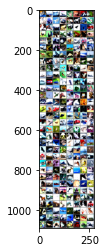

In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()
#images, labels = images.to(device), labels.to(device)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [12]:
images, labels = images.to(device), labels.to(device)
outputs = net(images)

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])


The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [14]:
ts.test_category_wise(net, device, testloader, classes)

torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
torch.Size([256, 128, 8, 8])
torch.Size([256, 32, 32, 32])
torch.Size([256, 32, 16, 16])
torch.Size([256, 64, 16, 16])
torch.Size([256, 64, 8, 8])
